# Gradyan İnişi

Bu egzersizde, tek bir Gradyan İnişi Epoch'unun adımlarını gerçekleştirmek için gerekli fonksiyonları oluşturacaksınız. Daha sonra fonksiyonları birleştirecek ve tüm Gradyan İnişi prosedürü boyunca bir döngü oluşturacaksınız.

## 1. Veri Keşfi

Sizin için mineral içerikleri olan malzemelerin aşağıdaki veri setini içe aktaracağız

In [1]:
import pandas as pd

data = pd.read_csv("https://d32aokrjazspmn.cloudfront.net/materials/gradient_descent_ingredients_zinc_phosphorous.csv")
data.head()

,aliment,zinc,phosphorus
0,Durum wheat pre-cooked. whole grain. cooked. u...,0.120907,0.193784
1,Asian noodles. plain. cooked. unsalted,0.047859,0.060329
2,Rice. brown. cooked. unsalted,0.156171,0.201097
3,Rice. cooked. unsalted,0.065491,0.045704
4,Rice. parboiled. cooked. unsalted,0.025189,0.045704


👇 `Fosfor` ve `Çinko` arasında bir nebze Doğrusal bir ilişkiyi görselleştirebiliriz.   

Aralarında en uygun çizgiyi bulmak için Gradyan İnişi kullanalım!

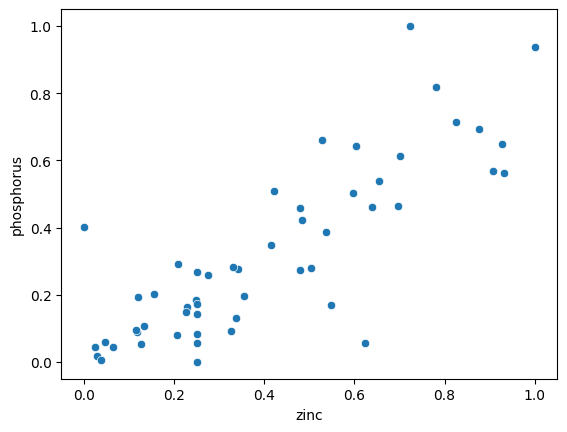

In [2]:
import seaborn as sns

sns.scatterplot(data=data, x='zinc', y='phosphorus');

❓ İki `np.Array` oluşturun
- çinko için `data_X` 
- fosfor için `data_Y`

In [3]:
data_X = data['zinc'].values
data_Y = data['phosphorus'].values

In [4]:
assert (data_X.shape == (53,))
assert (data_Y.shape == (53,))

## 2. Bir Epoch Kodlama

Bu egzersizin bu bölümünde, gradyan inişinin bir epoch $\color {red}{(k)}$ sırasında parametreleri güncellemek için kullanılan temel fonksiyonları tanımlayacaksınız. Aşağıdaki formülü hatırlayın

$$
\beta_0^{\color {red}{(k+1)}} = \beta_0^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_0}(\beta^{\color{red}{(k)}})
$$


$$
\beta_1^{\color {red}{(k+1)}} = \beta_1^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_1}(\beta^{\color {red}{(k)}})
$$

### 2.1 Hipotez Fonksiyonu

$$
\hat{y} =  a x + b
$$

❓ Doğrusal Regresyon hipotez fonksiyonunu tanımlayın. `a`'nın eğim ve `b`'nin y-kesiti olmasına izin verin.

In [8]:
def h(X,a,b):
    return a * X + b

### 2.2 Kayıp Fonksiyonu

$$
Kareler\ Toplamı\ Kaybı = \sum_{i=0}^n (y^{(i)} - \hat{y}^{(i)} )^2
$$

❓ Yukarıdaki denklemi kullanarak Hipotez Fonksiyonu için SSR Kayıp Fonksiyonunu tanımlayın. Yeni fonksiyonunuzu yazarken yukarıda kodlanan `h` fonksiyonunu yeniden kullanın.

In [9]:
import numpy as np

def loss(X, Y, a, b):
    y_pred = h(X, a, b)
    return np.sum((Y - y_pred) ** 2)

❓ Eğer aşağıdaki değerler olsaydı tüm malzemeler veri setimizde hesaplanan toplam Kayıp ne olurdu:
- a = 1 
- b = 1

In [10]:
print(loss(data_X, data_Y, a=1, b=1))

63.868506986115456


⚠️ 63.86 değerini alıyor olmalısınız. Eğer almıyorsanız, fonksiyonunuzda bir şeyler yanlış. Devam etmeden önce düzeltin!

### 2.3 Gradyan

$$
\frac{d\ SSR}{d\ eğim}= \sum_{i=0}^n -2  x_i (y^{(i)} - \hat{y}^{(i)} )
$$

$$
\frac{d\ SSR}{d\ y-kesiti}= \sum_{i=0}^n -2(y^{(i)} - \hat{y}^{(i)} ) 
$$

❓ Belirli bir noktada `a` ve `b` parametrelerine göre Kayıp Fonksiyonunun kısmi türevlerini hesaplayan bir fonksiyon tanımlayın.

<details>
<summary>💡 İpucu</summary>
Yine, verilen noktalarda tahminleri hesaplamak için yeni fonksiyonunuzda Hipotez Fonksiyonunu yeniden kullanmalısınız.
</details>

In [11]:
def gradient(X,Y,a,b):
    y_pred = h(X, a, b)
    residuals = Y - y_pred
    d_a = np.sum(-2 * X * residuals)
    d_b = np.sum(-2 * residuals)
    
    return d_a, d_b

❓ Fonksiyonunuzu kullanarak, eğer aşağıdaki değerler olsaydı her parametrenin kısmi türevleri ne olurdu:
- a = 1
- b = 1

In [12]:
print(gradient(data_X, data_Y, 1, 1))

(48.459065809109006, 115.17923733301406)


⚠️ 48.45 ve 115.17 değerlerini alıyor olmalısınız. Eğer almıyorsanız, fonksiyonunuzu düzeltin!

### 2.4 Adım Boyutları

$$
adım\ boyutu = gradyan \cdot öğrenme\ oranı
$$

❓ Her parametre (`a`,`b`) boyunca, türevleri (`d_a`, `d_b`) ve varsayılan olarak `0.01`'e eşit bir `learning_rate`'e göre adım boyutlarını hesaplayan bir fonksiyon tanımlayın

In [13]:
def steps(d_a, d_b, learning_rate=0.01):
    step_a = d_a * learning_rate
    step_b = d_b * learning_rate
    return step_a, step_b

❓ (`a`,`b`) = (1,1) için yukarıda hesaplanan türevler için atılacak adımlar (`step_a`, `step_b`) ne olurdu?

In [14]:
d_a, d_b = gradient(data_X, data_Y, 1, 1)
print(steps(d_a, d_b))

(0.4845906580910901, 1.1517923733301405)


⚠️ Adımlar `a` için 0.48 ve `b` için 1.15 olmalıdır

### 2.5 Parametreleri güncellemek (a, b)

$$
güncellenmiş\ parametre = eski\ parametre\ değeri - adım\ boyutu
$$

❓ Eski parametre değerlerinden ve adım boyutlarından güncellenmiş parametre değerlerini hesaplayan bir fonksiyon tanımlayın.

In [15]:
def update_params(a, b, step_a, step_b):
    a_new = a - step_a
    b_new = b - step_b
    return a_new, b_new

### 2.6 Tam bir epoch

❓ Az önce oluşturduğunuz fonksiyonları kullanarak, aşağıdaki parametrelerle başlamış olsaydınız ilk Epoch'un sonunda güncellenmiş parametreleri hesaplayın:
- a = 1
- b = 1

In [16]:
a = 1
b = 1

d_a, d_b = gradient(data_X, data_Y, a, b)

step_a, step_b = steps(d_a, d_b, learning_rate=0.01)

a_new, b_new = update_params(a, b, step_a, step_b)

print(f"Updated a: {a_new}")
print(f"Updated b: {b_new}")

Updated a: 0.5154093419089099
Updated b: -0.1517923733301405


⚠️ Aşağıdaki değerleri alıyor olmalısınız:
   - updated_a = 0.51
   - updated_b = -0.15

## 3. Gradyan İnişi

❓ Artık Gradyan İnişi için gerekli fonksiyonlara sahip olduğunuza göre, yakınsama sağlanana kadar epoch'lar boyunca döngü yapın.

- `a = 1` ve `b = 1` parametrelerini başlatın
- Yakınsamayı **100 epoch** olarak kabul edin
- Her yeni epoch'u güncellenmiş parametrelerle başlatmayı unutmayın
- Her epoch'ta `loss`, `a`, ve `b` değerlerini sırasıyla `loss_history`, `a_history` ve `b_history` adlı listelerine ekleyin

In [17]:
a = 1
b = 1
n_epochs = 100
learning_rate = 0.01

loss_history = []
a_history = []
b_history = []

for epoch in range(n_epochs):
    current_loss = loss(data_X, data_Y, a, b)
    loss_history.append(current_loss)
    a_history.append(a)
    b_history.append(b)
    
    d_a, d_b = gradient(data_X, data_Y, a, b)
    
    step_a, step_b = steps(d_a, d_b, learning_rate)
    
    a, b = update_params(a, b, step_a, step_b)

❓ 100 epoch'un sonundaki parametre değerleri nelerdir? Onları sırasıyla `a_100` ve `b_100` değişkenlerine kaydedin

In [18]:
a_100 = a
b_100 = b

print(f"Final a: {a_100}")
print(f"Final b: {b_100}")

Final a: 0.768671510620374
Final b: 0.00708932115622393


In [19]:
# 🧪 Test your code
from nbresult import ChallengeResult
result = ChallengeResult('descent',
                         a_100=a_100,
                         b_100=b_100)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/berkayturhan/.pyenv/versions/workintech/bin/python
cachedir: .pytest_cache
rootdir: /Users/berkayturhan/S16D4-S-data-solvers/S16D4-S-gradient-descent/tests
plugins: dash-3.3.0, anyio-4.8.0, typeguard-4.4.2
collecting ... collected 2 items

test_descent.py::TestDescent::test_a PASSED                              [ 50%]
test_descent.py::TestDescent::test_b PASSED                              [100%]

============================== 2 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/descent.pickle

git commit -m 'Completed descent step'

git push origin master



## 4. Görsel kontrol

❓ Bu yinelemeli yaklaşımı `gradient_descent()` metoduna sarın, bu metod `new_a`, `new_b` ve şu listeleri içeren bir sözlük olan `history`'yi döndürsün: 
- `loss_history`
- `a_history`
- `b_history`

In [20]:
def gradient_descent(X, Y, a_init=1, b_init=1, learning_rate=0.001, n_epochs=100):
    a = a_init
    b = b_init
    
    history = {
        'loss_history': [],
        'a_history': [],
        'b_history': []
    }
    
    for _ in range(n_epochs):
        history['loss_history'].append(loss(X, Y, a, b))
        history['a_history'].append(a)
        history['b_history'].append(b)
        
        d_a, d_b = gradient(X, Y, a, b)
        step_a, step_b = steps(d_a, d_b, learning_rate)
        a, b = update_params(a, b, step_a, step_b)
        
    return a, b, history

❓ Gradyan İniş'inizin parametrelerini kullanarak Çinko ve Fosfor arasında en uygun çizgiyi çizin.

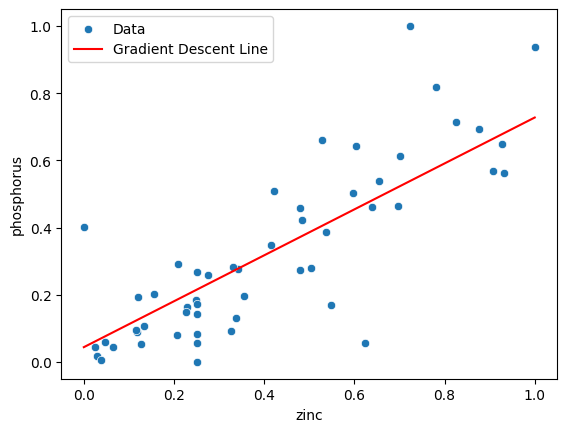

In [21]:
import matplotlib.pyplot as plt
a_final, b_final, history = gradient_descent(data_X, data_Y, learning_rate=0.001, n_epochs=100)

sns.scatterplot(data=data, x='zinc', y='phosphorus', label='Data')

x_range = np.linspace(min(data_X), max(data_X), 100)
y_range = h(x_range, a_final, b_final)

plt.plot(x_range, y_range, color='red', label='Gradient Descent Line')
plt.legend()
plt.show()

## 5. İnişinizi görselleştirin

🎯 Hedefimiz kayıp fonksiyonumuzu ve gradyan inişi adımlarını matplotlib'in `contourf` kullanarak 2D yüzey üzerinde çizmektir

❓ Çizim için ihtiyacımız olan veriyi oluşturarak başlayın
- `range_a`: `a` için -1 ile 1 arasında eşit aralıklı 100 değerlik bir aralık
- `range_b`: `b` için -1 ile 1 arasında eşit aralıklı 100 değerlik bir aralık 
- `Z`: her `Z[j,i]` elementinin `a` = `range_a[i]` ve `b` = `range_b[j]` noktasında kayıp fonksiyonunun değerine eşit olduğu 2D-dizi

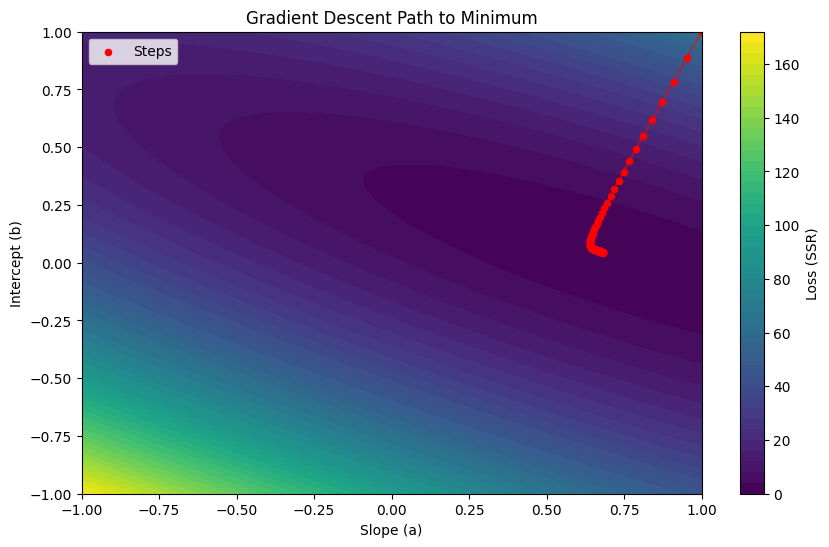

In [22]:
# 1. Parametre uzayını oluştur (Grid)
range_a = np.linspace(-1, 1, 100)
range_b = np.linspace(-1, 1, 100)

# Z matrisini oluştur (Her a,b ikilisi için loss değeri)
Z = np.zeros((len(range_a), len(range_b)))

for i, a_val in enumerate(range_a):
    for j, b_val in enumerate(range_b):
        Z[j, i] = loss(data_X, data_Y, a_val, b_val) 
        # Dikkat: j (satır) b'ye, i (sütun) a'ya karşılık gelir

# 2. Grafiği Çiz
plt.figure(figsize=(10, 6))

# Kontur çizgileri (Loss Yüzeyi)
plt.contourf(range_a, range_b, Z, levels=50, cmap='viridis')
plt.colorbar(label='Loss (SSR)')

# Bizim adımlarımız (Gradient Descent Yolu)
plt.scatter(history['a_history'], history['b_history'], c='red', s=20, label='Steps')
plt.plot(history['a_history'], history['b_history'], c='red', alpha=0.5) # Yolu çizgiyle birleştir

plt.xlabel('Slope (a)')
plt.ylabel('Intercept (b)')
plt.title('Gradient Descent Path to Minimum')
plt.legend()
plt.show()

❓ Şimdi, tek bir subplot'ta şunları çizin:
- 3 parametre ile matplotlib [contourf](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html) kullanarak kayıp fonksiyonunuzu 2D-yüzey olarak
- gradyan inişinizi görselleştirmek için tüm geçmiş (a,b) noktalarını kırmızı noktalar olarak serpilme grafiği!

Öğrenme oranınızı değiştirin ve grafik üzerindeki etkisini gözlemleyin!

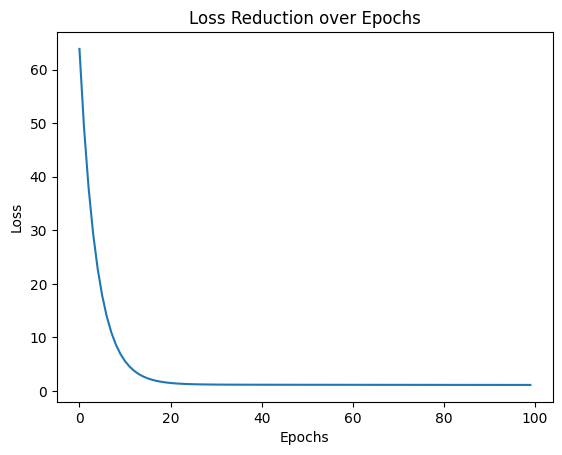

In [23]:
# Kayıp Değerlerinin Değişimi (Loss Curve)
plt.plot(history['loss_history'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Reduction over Epochs')
plt.show()

❓ [isteğe bağlı] Peki ya 3D? Aşağıda aynı veriyi [plot.ly 3D kontur grafiği](https://plotly.com/python/3d-surface-plots/) üzerinde çizmeyi deneyin

In [ ]:
import plotly.graph_objects as go

surface = go.Surface(x=range_a, y=range_b, z=Z)
scatter = go.Scatter3d(x=history['a'], y=history['b'], z=history['loss'], mode='markers')
fig = go.Figure(data=[surface, scatter])

#fig.update_layout(title='Loss Function', autosize=False, width=500, height=500)
fig.show()

❓ `kayıp` değerlerinin geçmişini `epoch` sayısının bir fonksiyonu olarak çizin. 0.001'den 0.01'e kadar `learning_rate`'in birden fazla varyasyonuyla deneyin ve farkı anladığınızdan emin olun

In [ ]:
# YOUR CODE HERE

## 6. Sklearn ile...

❓ Sklearn kullanarak, aynı veri üzerinde bir Doğrusal Regresyon modeli eğitin. Parametrelerini Gradyan İnişiniz ile hesaplananlarla karşılaştırın.

In [25]:
from sklearn.linear_model import LinearRegression

# Sklearn 2D array ister (n_samples, n_features)
X_reshaped = data_X.reshape(-1, 1)

model = LinearRegression()
model.fit(X_reshaped, data_Y)

print(f"Sklearn a (coef): {model.coef_[0]}")
print(f"Sklearn b (intercept): {model.intercept_}")

print(f"Bizim a: {a_final}")
print(f"Bizim b: {b_final}")

Sklearn a (coef): 0.7688371715345806
Sklearn b (intercept): 0.0070177202010620054
Bizim a: 0.6834909720429545
Bizim b: 0.043907362827260835


Hemen hemen aynı olmalıdırlar!

### 🏁 Tebrikler! İşiniz bittiğinde lütfen egzersizinizi push edin